# Импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # для работы с разными расширениями картинок
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 # набор данных (60К данных 10 классов)
from tensorflow.keras.models import Sequential # класс для создания слоев нейросети
from tensorflow.keras.layers import Flatten, Dense, Dropout # класс для создания полносвязных слоев нейросети
from tensorflow.keras.utils import to_categorical # преобразует вектор в матрицу двоичных классов
# import ssl

In [2]:
# Отключаем проверку SSL для MAC
# ssl._create_default_https_context = ssl._create_unverified_context

# Преобразование данных для нейросети

In [ ]:
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
# подготовка изображений чтобы все пиксели имели вес от 0-1
x_train = x_train / 255
x_val = x_val / 255

# мерки классов преобразовываем в категориальные переменные
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

# Настройка нейросети

In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)), # принимает на вход изображения 32*32 на 3 канала RGB
    Dense(1000, activation='relu'), # полносвязный слой с функцией активации релу
    Dense(500, activation='relu'),
    Dense(250, activation='relu'), 
    Dense(10, activation='softmax') # 10 - нейронов, потому что 10 классов, каждый из 10 нейронов будет активирован от 0-100: вероятность принадлежности к классу
])

# Обучение

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # лос-вычисляет насколько наше распределение вероятностей далеко от правды
# model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val)) # тренируем массив, batch_size - пачка картинок для тренировки, валидационные данные для проверки


In [10]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=64
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.2645 - loss: 2.0538 - val_accuracy: 0.3917 - val_loss: 1.6871
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.3918 - loss: 1.6904 - val_accuracy: 0.4158 - val_loss: 1.6594
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.4274 - loss: 1.5949 - val_accuracy: 0.4502 - val_loss: 1.5322
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4554 - loss: 1.5261 - val_accuracy: 0.4612 - val_loss: 1.4995
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.4701 - loss: 1.4716 - val_accuracy: 0.4726 - val_loss: 1.4912
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.4916 - loss: 1.4200 - val_accuracy: 0.4658 - val_loss: 1.4754
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5018 - loss: 1.3923 - val_accuracy: 0.4782 - val_loss: 1.4614
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.5048 - loss: 1.3737 - 

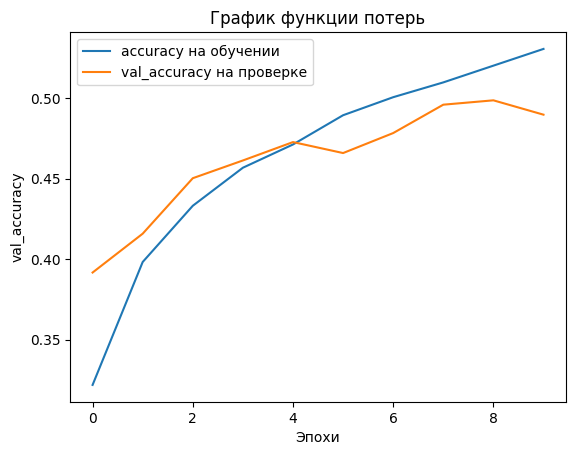

In [11]:
plt.plot(history.history['accuracy'], label='accuracy на обучении')
plt.plot(history.history['val_accuracy'], label='val_accuracy на проверке')
plt.xlabel('Эпохи')
plt.ylabel('val_accuracy')
plt.legend()
plt.title('График функции потерь')
plt.show()

# Save модели

In [13]:
model.save('DPO_WEIGHTS.h5')